In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [2]:
#Loading the datasets
Courses = pd.read_csv('C:/Users/HSEF/Documents/Learning_analytics/courses.csv')
Assessment = pd.read_csv('C:/Users/HSEF/Documents/Learning_analytics/assessments.csv')
StudentAssessment = pd.read_csv('C:/Users/HSEF/Documents/Learning_analytics/studentAssessment.csv')
StudentInfo = pd.read_csv('C:/Users/HSEF/Documents/Learning_analytics/studentInfo.csv')
StudentRegistration = pd.read_csv('C:/Users/HSEF/Documents/Learning_analytics/studentRegistration.csv')
vle = pd.read_csv('C:/Users/HSEF/Documents/Learning_analytics/vle.csv')
StudentVle = pd.read_csv('C:/Users/HSEF/Documents/Learning_analytics/studentVle.csv')

In [3]:
# Merging the data Student info, Student registration and Courses
Personal_data = pd.merge(StudentRegistration, StudentInfo, on=['id_student', 'code_module', 'code_presentation'], how='inner')
Personal_data = pd.merge(Personal_data, Courses, on=['code_module', 'code_presentation'], how='inner')

In [4]:
Personal_data.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,AAA,2013J,28400,-53.0,NaN,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,268
2,AAA,2013J,30268,-92.0,12.0,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,268
3,AAA,2013J,31604,-52.0,NaN,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,268
4,AAA,2013J,32885,-176.0,NaN,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,268


In [5]:
# Merging Student assessment and assessment
assesment_data = Assessment.merge(StudentAssessment,on=['id_assessment'],how="inner")
assesment_data.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0


In [6]:
data = assesment_data.merge(Personal_data,on=['code_module','code_presentation','id_student'],how="inner")
data.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,...,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0,...,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0,...,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,268
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0,...,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,268
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0,...,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,268
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0,...,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,268


In [7]:
Data = data.copy()

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 173912 non-null  object 
 1   code_presentation           173912 non-null  object 
 2   id_assessment               173912 non-null  int64  
 3   assessment_type             173912 non-null  object 
 4   date                        171047 non-null  float64
 5   weight                      173912 non-null  float64
 6   id_student                  173912 non-null  int64  
 7   date_submitted              173912 non-null  int64  
 8   is_banked                   173912 non-null  int64  
 9   score                       173739 non-null  float64
 10  date_registration           173905 non-null  float64
 11  date_unregistration         13055 non-null   float64
 12  gender                      173912 non-null  object 
 13  region        

In [9]:
# Filling nulls with 0
Data["score"] = Data["score"].fillna(0)

In [10]:
# Dropping Date unregistered column due to too many nulls
Data.drop(['date_unregistration'],axis=1,inplace=True)

In [11]:
Data.isna().sum()

code_module                      0
code_presentation                0
id_assessment                    0
assessment_type                  0
date                          2865
weight                           0
id_student                       0
date_submitted                   0
is_banked                        0
score                            0
date_registration                7
gender                           0
region                           0
highest_education                0
imd_band                      7697
age_band                         0
num_of_prev_attempts             0
studied_credits                  0
disability                       0
final_result                     0
module_presentation_length       0
dtype: int64

In [12]:
# Creating the Week column to represent assessment adherence
Data['week'] = np.where(
    Data['date_submitted'] > Data['module_presentation_length'],
    (Data['module_presentation_length'] // 7) + 1,
    np.where(
        Data['date_submitted'] < 0,
        0,
        Data['date_submitted'] // 7 + 1
    )
)

In [13]:
# Merging vle and student vle
StudentVle['week'] = StudentVle['date'].apply(lambda x: 0 if x < 0 else (x // 7) + 1)

In [14]:
student_interaction = StudentVle.merge(vle,on=['code_module','code_presentation','id_site'],how="inner")

In [15]:
# Getting a column for total clicks and Interaction counts
grouped_student_interaction = student_interaction.groupby(
    ['id_student', 'code_module', 'code_presentation','activity_type', 'week'], as_index=False
).agg(
    total_clicks=('sum_click', 'sum'),
    interaction_count=('sum_click', 'count')
)

In [16]:
# Merging the grouped data with the older merged data
merged_dataset = pd.merge(
    grouped_student_interaction,
    Data,
    on=['id_student', 'code_presentation', 'code_module', 'week'],
    how='inner'
)

In [17]:
merged_dataset.head()

,id_student,code_module,code_presentation,activity_type,week,total_clicks,interaction_count,id_assessment,assessment_type,date,...,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,6516,AAA,2014J,forumng,3,12,6,1758,TMA,19.0,...,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269
1,6516,AAA,2014J,forumng,8,31,13,1759,TMA,54.0,...,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269
2,6516,AAA,2014J,forumng,17,11,10,1760,TMA,117.0,...,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269
3,6516,AAA,2014J,forumng,24,4,2,1761,TMA,166.0,...,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269
4,6516,AAA,2014J,forumng,31,9,2,1762,TMA,215.0,...,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269


In [18]:
# Renaming categories in the highest_education column
merged_dataset['highest_education'] = np.where( (merged_dataset['highest_education'] == 'No Formal quals'),'Lower Than A Level',merged_dataset['highest_education'])

# Rename post-grads
merged_dataset['highest_education'] = np.where( (merged_dataset['highest_education'] == 'Post Graduate Qualification'),'HE Qualification',merged_dataset['highest_education'])

In [19]:
# Normalizing the age column
merged_dataset['age_band'] = np.where( (merged_dataset['age_band'] == '55<='), '35+', merged_dataset['age_band'])

merged_dataset['age_band'] = np.where( (merged_dataset['age_band'] == '35-55'),'35+',merged_dataset['age_band'])

In [20]:
# creating the assessment engagement colum and the module engagement column
merged_dataset['assessment_engagement_score'] = merged_dataset['total_clicks'] * merged_dataset['interaction_count']
merged_dataset['submission_timeliness'] = merged_dataset['date_submitted'] - merged_dataset['date']
merged_dataset['module_engagement_rate'] = merged_dataset['total_clicks'] / merged_dataset['module_presentation_length']

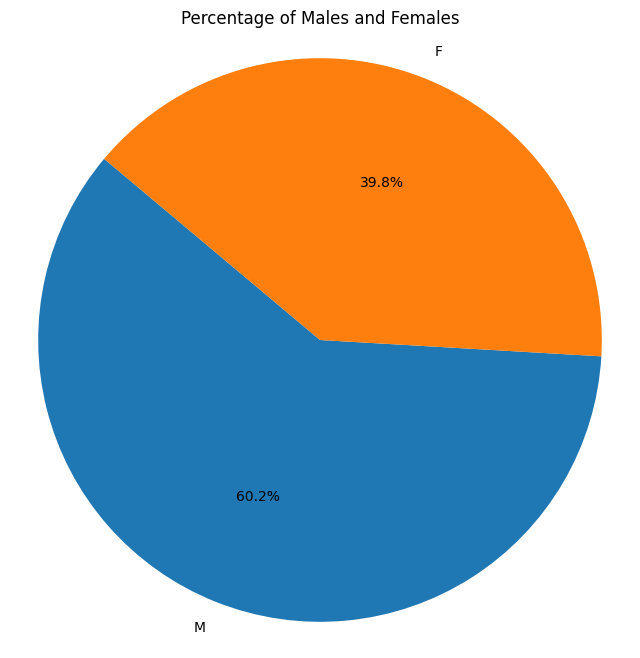

In [21]:
# prompt: generate a pie chart showing the percentage of males and females

import matplotlib.pyplot as plt
gender_counts = merged_dataset['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Males and Females')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

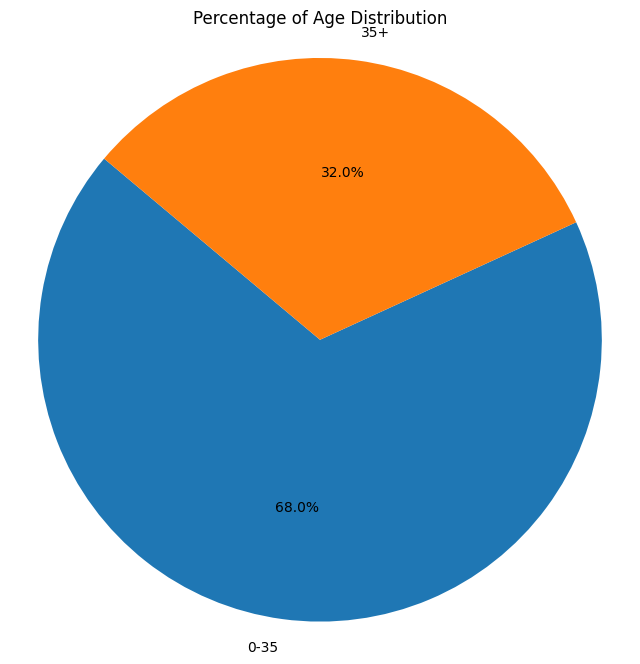

In [22]:
# prompt: generate a pie chart to show age distribution in percentage.

import matplotlib.pyplot as plt
age_band_counts = merged_dataset['age_band'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_band_counts, labels=age_band_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Age Distribution')
plt.axis('equal')
plt.show()

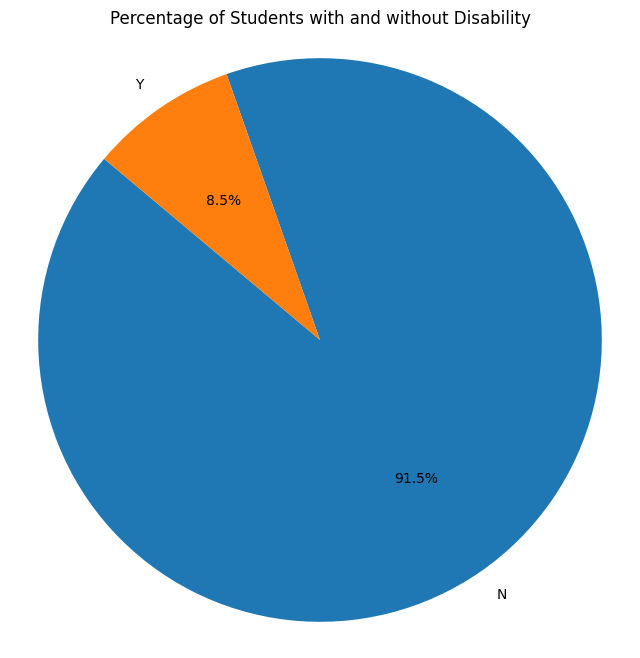

In [23]:
# prompt: generate a pie chart for disability

import matplotlib.pyplot as plt
disability_counts = merged_dataset['disability'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(disability_counts, labels=disability_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Students with and without Disability')
plt.axis('equal')
plt.show()

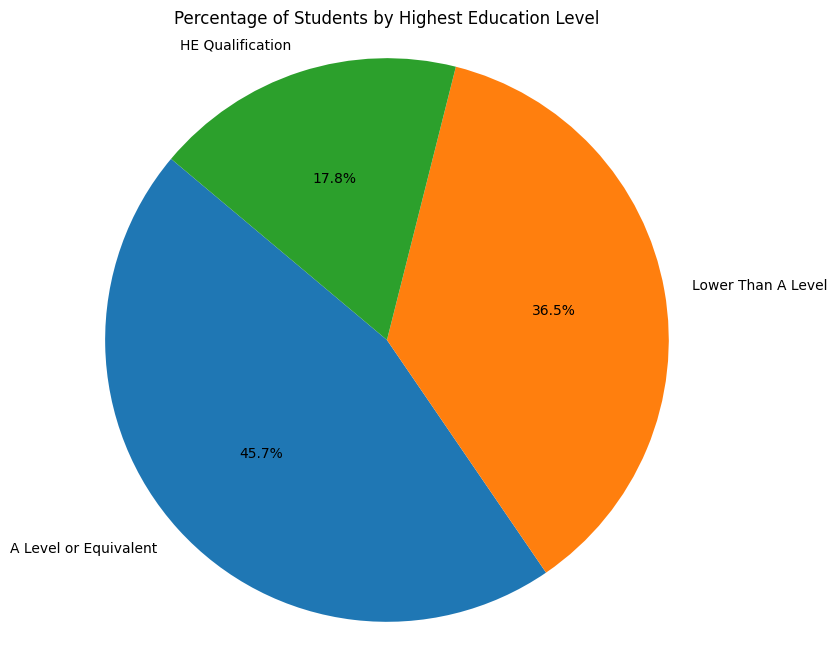

In [24]:
# prompt: Generate a pie chart to show educational level

import matplotlib.pyplot as plt
highest_education_counts = merged_dataset['highest_education'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(highest_education_counts, labels=highest_education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Students by Highest Education Level')
plt.axis('equal')
plt.show()

In [25]:
merge_new = merged_dataset.copy()

In [26]:
summary_columns = {
    # 'activity_type': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Handle empty mode results
    'total_clicks': 'sum',
    'interaction_count': 'sum',
    'assessment_type': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Handle empty mode results
    'date': 'mean',
    'weight': 'mean',
    'date_submitted': 'mean',
    'is_banked': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Handle empty mode results
    'score': 'mean',
    'date_registration': 'mean',
    'gender': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Handle empty mode results
    'region': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Handle empty mode results
    'highest_education': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Handle empty mode results
    'imd_band': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Handle empty mode results
    'age_band': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Handle empty mode results
    'num_of_prev_attempts': 'mean',
    'studied_credits': 'mean',
    'disability': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Handle empty mode results
    'module_presentation_length': 'mean',
    'assessment_engagement_score': 'mean',
    'submission_timeliness': 'mean',
    'module_engagement_rate': 'mean',

}


In [27]:
summary_df = merge_new.groupby(['id_student', 'week', 'code_module', 'final_result']).agg(summary_columns).reset_index()

In [28]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139014 entries, 0 to 139013
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id_student                   139014 non-null  int64  
 1   week                         139014 non-null  int64  
 2   code_module                  139014 non-null  object 
 3   final_result                 139014 non-null  object 
 4   total_clicks                 139014 non-null  int64  
 5   interaction_count            139014 non-null  int64  
 6   assessment_type              139014 non-null  object 
 7   date                         136587 non-null  float64
 8   weight                       139014 non-null  float64
 9   date_submitted               139014 non-null  float64
 10  is_banked                    139014 non-null  int64  
 11  score                        139014 non-null  float64
 12  date_registration            139011 non-null  float64
 13 

In [29]:
# filling all numerical colums with missing data and also standardizing them.
numerical_cols = summary_df.select_dtypes(include=[np.number]).columns

numerical_data = summary_df[numerical_cols].copy()

numerical_data.replace([np.inf, -np.inf], np.nan, inplace=True)
numerical_data.fillna(0, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numerical_data)

scaled_data_df = pd.DataFrame(scaled_data, columns=numerical_cols)
scaled_data_df.drop(columns='id_student', inplace=True)
scaled_data_df.head()

,week,total_clicks,interaction_count,date,weight,date_submitted,is_banked,score,date_registration,num_of_prev_attempts,studied_credits,module_presentation_length,assessment_engagement_score,submission_timeliness,module_engagement_rate
0,0.076923,0.003961,0.011439,0.072797,0.1,0.096552,0.0,0.60,0.628641,0.0,0.05,1.0,0.002476,0.580952,0.026556
1,0.205128,0.004672,0.014449,0.206897,0.2,0.213793,0.0,0.48,0.628641,0.0,0.05,1.0,0.007414,0.578571,0.053830
2,0.435897,0.003809,0.013847,0.448276,0.2,0.437931,0.0,0.63,0.628641,0.0,0.05,1.0,0.001689,0.583333,0.020934
3,0.615385,0.005180,0.011439,0.636015,0.2,0.603448,0.0,0.61,0.628641,0.0,0.05,1.0,0.003291,0.580952,0.035169
4,0.794872,0.002743,0.009031,0.823755,0.3,0.762069,0.0,0.77,0.628641,0.0,0.05,1.0,0.000974,0.573810,0.014654


In [30]:
# Merging Categorical columns and numerical columns
categorical_cols = summary_df.select_dtypes(exclude=[np.number]).columns
categorical_data = summary_df[categorical_cols]


In [31]:
# prompt: generate a code that categorizes the final_result column in new_standard to just 1 and 0
categorical_data['final_result'] = categorical_data['final_result'].map({'Pass': 1, 'Distinction': 1, 'Withdrawn': 0, 'Fail':0})

# Handle potential NaN values (optional): fill NaN values with a specific value, e.g. 0
categorical_data['final_result'].fillna(0, inplace=True)

In [32]:
# Encoding the categorical columns

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column in categorical_data
for col in categorical_data.columns:
  # Fit and transform the column using LabelEncoder
  categorical_data[col] = le.fit_transform(categorical_data[col])

categorical_data.head()


,code_module,final_result,assessment_type,gender,region,highest_education,imd_band,age_band,disability
0,0,1,2,1,6,1,8,1,0
1,0,1,2,1,6,1,8,1,0
2,0,1,2,1,6,1,8,1,0
3,0,1,2,1,6,1,8,1,0
4,0,1,2,1,6,1,8,1,0


In [33]:
standard_data = pd.concat([scaled_data_df, categorical_data], axis=1)
standard_data.head()

,week,total_clicks,interaction_count,date,weight,date_submitted,is_banked,score,date_registration,num_of_prev_attempts,...,module_engagement_rate,code_module,final_result,assessment_type,gender,region,highest_education,imd_band,age_band,disability
0,0.076923,0.003961,0.011439,0.072797,0.1,0.096552,0.0,0.60,0.628641,0.0,...,0.026556,0,1,2,1,6,1,8,1,0
1,0.205128,0.004672,0.014449,0.206897,0.2,0.213793,0.0,0.48,0.628641,0.0,...,0.053830,0,1,2,1,6,1,8,1,0
2,0.435897,0.003809,0.013847,0.448276,0.2,0.437931,0.0,0.63,0.628641,0.0,...,0.020934,0,1,2,1,6,1,8,1,0
3,0.615385,0.005180,0.011439,0.636015,0.2,0.603448,0.0,0.61,0.628641,0.0,...,0.035169,0,1,2,1,6,1,8,1,0
4,0.794872,0.002743,0.009031,0.823755,0.3,0.762069,0.0,0.77,0.628641,0.0,...,0.014654,0,1,2,1,6,1,8,1,0


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 10))
sns.heatmap(standard_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# prompt: generate a code to show correlation in ascending order

correlation_matrix = standard_data.corr()
correlation_with_result = correlation_matrix['final_result'].sort_values(ascending=True)

correlation_with_result

In [ ]:
standard_data['final_result'].unique()

In [ ]:
new_standard = standard_data.copy()

In [ ]:
# prompt: generate a code that categorizes the final_result column in new_standard to just 1 and 0
#new_standard['final_result'] = new_standard['final_result'].map({'Pass': 1, 'Distinction': 1, 'Withdrawn': 0, 'Fail':0})

# Handle potential NaN values (optional): fill NaN values with a specific value, e.g. 0
#new_standard['final_result'].fillna(0, inplace=True)

In [ ]:
from re import X
# Separating the dependent variable from the independent variables
X = new_standard.drop(columns=['final_result'])
y = new_standard['final_result']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Random Forest CLassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

In [ ]:
# Train the model
logreg_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

In [ ]:
# Print the confusion matrix
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

In [ ]:
# Print the classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the model
dt_classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

In [ ]:
# Calculate metrics for each model
def calculate_metrics(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  return accuracy, precision, recall, f1

rf_accuracy, rf_precision, rf_recall, rf_f1 = calculate_metrics(y_test, y_pred)
dt_accuracy, dt_precision, dt_recall, dt_f1 = calculate_metrics(y_test, y_pred_dt)
logreg_accuracy, logreg_precision, logreg_recall, logreg_f1 = calculate_metrics(y_test, y_pred_logreg)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, dt_accuracy, logreg_accuracy],
    'Precision': [rf_precision, dt_precision, logreg_precision],
    'Recall': [rf_recall, dt_recall, logreg_recall],
    'F1-Score': [rf_f1, dt_f1, logreg_f1]
})

In [ ]:
metrics_df

In [ ]:
# Feature Importance
importance = pd.concat([pd.DataFrame(X_train.columns),
                          pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
importance.columns = ['Features', 'Coeff']
importance = importance.sort_values('Coeff', ascending=False)
importance

In [ ]:
# prompt: generate a graph showing the performance of the three models

import matplotlib.pyplot as plt
# Melt the metrics DataFrame for easier plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1) # Assuming scores are between 0 and 1
plt.grid(axis='y')
plt.show()

In [ ]:
# prompt: generate a pie chart showing the percentage of gender

import matplotlib.pyplot as plt
# Generate a pie chart for gender distribution
gender_counts = Personal_data['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# prompt: generate a code that will download the standard_data dataframe to a csv file
from IPython.display import FileLink
standard_data.to_csv('standard_data.csv', index=False)
FileLink('standard_data.csv')

In [ ]:
# prompt: generate a code that will download the standard_data dataframe to a csv file to lmy device

from IPython.display import FileLink